In [6]:
# Keras GPUの使用禁止
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [7]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn import datasets
from sklearn.datasets import load_iris

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

import warnings
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from line_profiler import LineProfiler

iris = datasets.load_iris()

train_X, res_x, train_y, res_y = train_test_split(
    iris.data,
    iris.target,
    stratify=iris.target,
    random_state=0
)
warnings.simplefilter('ignore')


In [8]:
# 学習させる（学習にかかる時間を計測する）

m_SVC = SVC()
m_LinearSVC = LinearSVC()
m_DecisionTreeClassifier = DecisionTreeClassifier()
m_GradientBoostingClassifier = GradientBoostingClassifier()
m_RandomForestClassifier = RandomForestClassifier()
m_KNeighborsClassifier = KNeighborsClassifier()
m_GaussianNB = GaussianNB()
m_SGDClassifier = SGDClassifier()
m_LogisticRegression = LogisticRegression()
m_MLPClassifier = MLPClassifier()
m_CNN = Sequential()
m_CNN.add(Conv1D(32, 2, activation="relu", input_shape=(4,1)))
m_CNN.add(Flatten())
m_CNN.add(Dense(64, activation="relu"))
m_CNN.add(Dense(1))
m_CNN.compile(loss="mse", optimizer="adam")


def main():
    for _ in range(10):
        m_SVC.fit(train_X, train_y)
        m_LinearSVC.fit(train_X, train_y)
        m_DecisionTreeClassifier.fit(train_X, train_y)
        m_GradientBoostingClassifier.fit(train_X, train_y)
        m_RandomForestClassifier.fit(train_X, train_y)
        m_KNeighborsClassifier.fit(train_X, train_y)
        m_GaussianNB.fit(train_X, train_y)
        m_SGDClassifier.fit(train_X, train_y)
        m_LogisticRegression.fit(train_X, train_y)
        m_MLPClassifier.fit(train_X, train_y)
        m_CNN.fit(train_X, train_y, batch_size=12, epochs=200, verbose=0)


pr = LineProfiler()
pr.add_function(main)
pr.runcall(main)
pr.print_stats()


Timer unit: 1e-07 s

Total time: 22.5294 s
File: C:\Users\Haya\AppData\Local\Temp/ipykernel_9376/1712153711.py
Function: main at line 21

Line #      Hits         Time  Per Hit   % Time  Line Contents
    21                                           def main():
    22        11        337.0     30.6      0.0      for _ in range(10):
    23        10      78724.0   7872.4      0.0          m_SVC.fit(train_X, train_y)
    24        10     410597.0  41059.7      0.2          m_LinearSVC.fit(train_X, train_y)
    25        10      47215.0   4721.5      0.0          m_DecisionTreeClassifier.fit(train_X, train_y)
    26        10   17246843.0 1724684.3      7.7          m_GradientBoostingClassifier.fit(train_X, train_y)
    27        10   15178048.0 1517804.8      6.7          m_RandomForestClassifier.fit(train_X, train_y)
    28        10      47558.0   4755.8      0.0          m_KNeighborsClassifier.fit(train_X, train_y)
    29        10      65152.0   6515.2      0.0          m_GaussianNB

In [9]:
# 予測させる（予測にかかる時間を計測する）

def main():
    for _ in range(10):
        m_SVC.predict(res_x)
        m_LinearSVC.predict(res_x)
        m_DecisionTreeClassifier.predict(res_x)
        m_GradientBoostingClassifier.predict(res_x)
        m_RandomForestClassifier.predict(res_x)
        m_KNeighborsClassifier.predict(res_x)
        m_GaussianNB.predict(res_x)
        m_SGDClassifier.predict(res_x)
        m_LogisticRegression.predict(res_x)
        m_MLPClassifier.predict(res_x)
        m_CNN.predict(res_x)


pr = LineProfiler()
pr.add_function(main)
pr.runcall(main)
pr.print_stats()


Timer unit: 1e-07 s

Total time: 0.812091 s
File: C:\Users\Haya\AppData\Local\Temp/ipykernel_9376/3160354835.py
Function: main at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def main():
     4        11        353.0     32.1      0.0      for _ in range(10):
     5        10      45091.0   4509.1      0.6          m_SVC.predict(res_x)
     6        10      14720.0   1472.0      0.2          m_LinearSVC.predict(res_x)
     7        10      14508.0   1450.8      0.2          m_DecisionTreeClassifier.predict(res_x)
     8        10      69620.0   6962.0      0.9          m_GradientBoostingClassifier.predict(res_x)
     9        10    1137014.0 113701.4     14.0          m_RandomForestClassifier.predict(res_x)
    10        10     230961.0  23096.1      2.8          m_KNeighborsClassifier.predict(res_x)
    11        10      24459.0   2445.9      0.3          m_GaussianNB.predict(res_x)
    12        10      14007.

In [10]:
# モデル評価
def make_row(name, model):
    pred_y = model.predict(res_x)
    return [name,
            f1_score(res_y, pred_y, average="micro"),
            accuracy_score(res_y, pred_y),
            precision_score(res_y, pred_y, average="micro"),
            recall_score(res_y, pred_y, average="micro"),
            ]


ar = [
    make_row("SVC", m_SVC),
    make_row("LinearSVC", m_LinearSVC),
    make_row("DecisionTreeClassifier", m_DecisionTreeClassifier),
    make_row("GradientBoostingClassifier", m_GradientBoostingClassifier),
    make_row("RandomForestClassifier", m_RandomForestClassifier),
    make_row("KNeighborsClassifier", m_KNeighborsClassifier),
    make_row("GaussianNB", m_GaussianNB),
    make_row("SGDClassifier", m_SGDClassifier),
    make_row("LogisticRegression", m_LogisticRegression),
    make_row("MLPClassifier", m_MLPClassifier),
    # make_row("Keras-CNN CPU", m_CNN),
]
df = pd.DataFrame(ar, columns=["Model", "F1-score", "Accuracy", "Precision", "Recall"])
df["Learn-time"] = [6607.9, 40967.2, 4990.2, 1831689.6, 1573357.6, 4742.3, 6687.3, 17993.5, 212187.2, 949669.1]
df["Predict-time"] = [2672.6, 889.3, 1029.4, 5805.1, 106890.0, 20264.1, 2046.3, 1152.9, 859.7, 1744.9]
df


,Model,F1-score,Accuracy,Precision,Recall,Learn-time,Predict-time
0,SVC,1.000000,1.000000,1.000000,1.000000,6607.9,2672.6
1,LinearSVC,0.973684,0.973684,0.973684,0.973684,40967.2,889.3
2,DecisionTreeClassifier,0.947368,0.947368,0.947368,0.947368,4990.2,1029.4
3,GradientBoostingClassifier,0.973684,0.973684,0.973684,0.973684,1831689.6,5805.1
4,RandomForestClassifier,0.947368,0.947368,0.947368,0.947368,1573357.6,106890.0
5,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000,4742.3,20264.1
6,GaussianNB,0.973684,0.973684,0.973684,0.973684,6687.3,2046.3
7,SGDClassifier,0.973684,0.973684,0.973684,0.973684,17993.5,1152.9
8,LogisticRegression,1.000000,1.000000,1.000000,1.000000,212187.2,859.7
9,MLPClassifier,1.000000,1.000000,1.000000,1.000000,949669.1,1744.9


<AxesSubplot:ylabel='Model'>

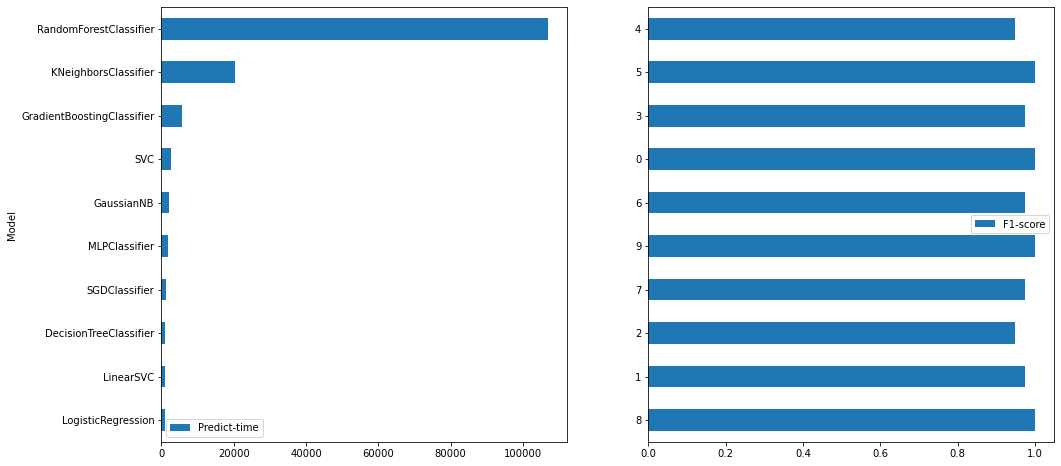

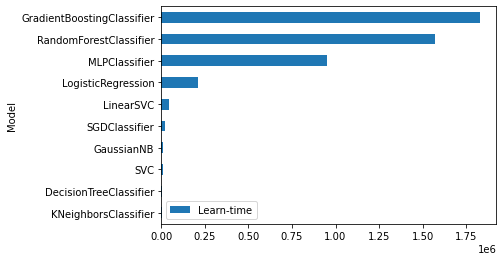

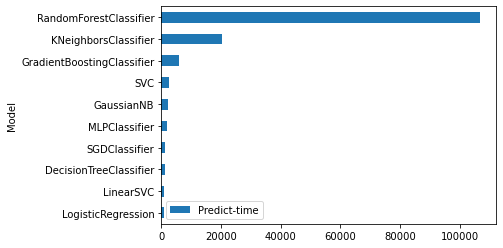

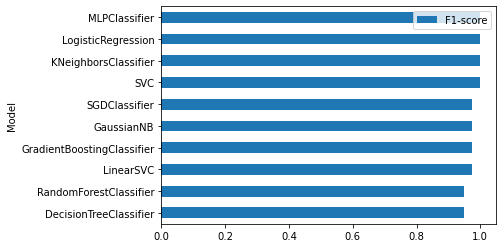

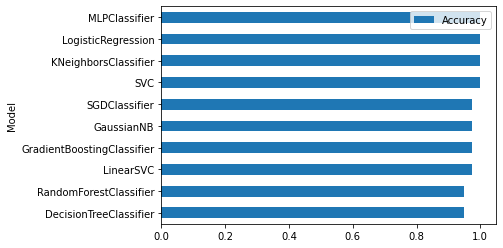

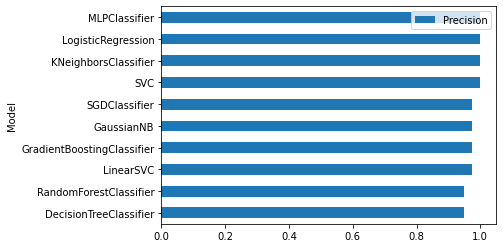

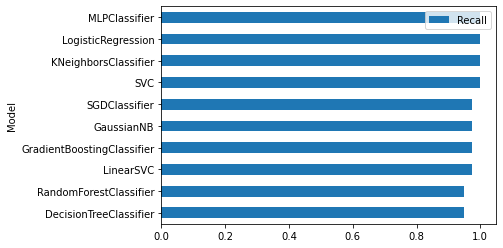

In [11]:
# グラフ化
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
df.sort_values("Predict-time").plot(kind='barh', x=df.columns[0], y=df.columns[6], ax=axes[0])
df.sort_values("Predict-time").plot(kind='barh', y=df.columns[1], ax=axes[1])

df.sort_values("Learn-time").plot(kind='barh', x=df.columns[0], y=df.columns[5])
df.sort_values("Predict-time").plot(kind='barh', x=df.columns[0], y=df.columns[6])
df.sort_values("F1-score").plot(kind='barh', x=df.columns[0], y=df.columns[1])
df.sort_values("Accuracy").plot(kind='barh', x=df.columns[0], y=df.columns[2])
df.sort_values("Precision").plot(kind='barh', x=df.columns[0], y=df.columns[3])
df.sort_values("Recall").plot(kind='barh', x=df.columns[0], y=df.columns[4])
